## Time to get you hands dirty!  Position of a star

You measure the position of a star $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

In [ ]:
# LECTURE 5 -> # POSITION OF A STAR: measure the position of a star N times with the same telescope -> homoscedastic errors
# The underlying process is Gaussian, the true position is mu = 1 and the error is sigma = 0.2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

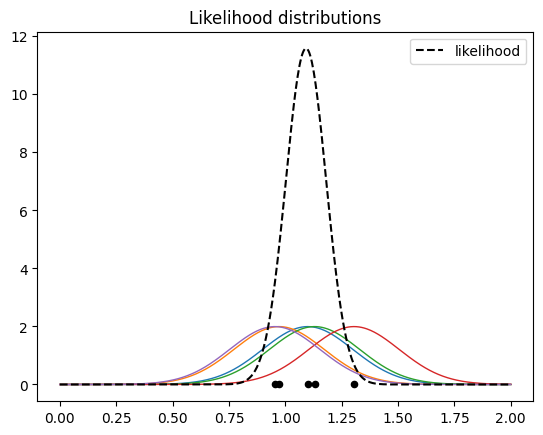

Likelihood is maximized at 1.090
The mean is the estimator 1.092


In [ ]:
# 1) Generate fake measurements. 
# - Treat each of these observations as an estimate of the true distribution. 
# - So we'll center a Gaussian (with the known sigma) at each point. This is the probability of each data point, P(xi | mu, sigma).
# - Plot each of the individual likelihoods separately and the likelihood of the dataset. 
# - Read off the maximum likelihood and compare it with the MLE estimator derived above.

N = 5 # number of measures 
mu = 1
sigma = 0.2

# Generation of gaussian values
np.random.seed(42) # reproducible results
x = np.random.normal(mu, sigma, N)

# Center a Gaussian at each point
xgrid = np.linspace(0, 2, 500)
Ls = [] # likelihoods

for i in range (N):
    L = norm.pdf(xgrid, x[i], sigma) # likelihood for each point
    Ls.append(L)
    plt.plot(xgrid, L, linewidth=1)

# Total likelihood in each point of xgrid
Ls = np.array(Ls)  # matrix (N x 500)
Ltot = np.prod(Ls, axis=0)
plt.plot(xgrid, Ltot, ls='--', c='black', label='total likelihood')  # Dataset likelihood in each point = product of the column values

zero = np.zeros(N)
plt.scatter(x, zero, color = 'black', s = 20)
plt.title("Likelihood distributions")
plt.legend()
plt.show()

sorted_indices = np.argsort(Ltot) # ascending order
index_max = sorted_indices[-1]
print("Likelihood is maximized at %.3f" % xgrid[index_max])
est_mu = xgrid[index_max]

MLest = np.mean(x)
print("The mean is the estimator %.3f" % MLest)

Fisher matrix error 0.089
Theoretical error 0.089


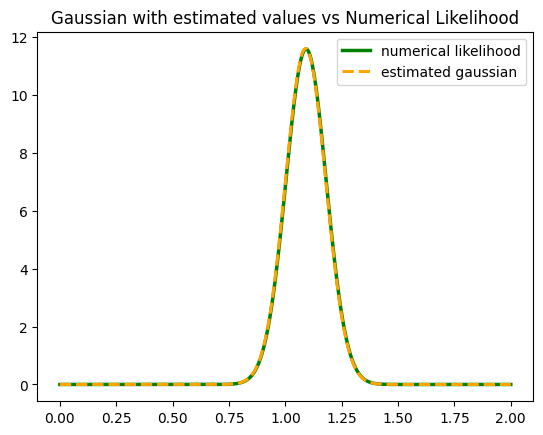

In [ ]:
# 2) Check if the Fisher matrix error estimate makes sense
# - Do a rough 2nd order differentation of our log-likelihood 
# - divide through by our DELTAtheta^2 to get the correct normalization
# - multiply by -1, then take the square root
# - Compare with the Fisher matrix error derived above
# - Plot a Gaussian at the measured mu with this error as the scale to see if it matches the numerical likelihood distribution. 

log_L = np.log(Ltot)
d2_LOGlike = np.diff(log_L, n=2)

DELTA_theta = (xgrid[1]-xgrid[0])
d2_LOGlike /= DELTA_theta**2
d2_LOGlike *= -1
d2_LOGlike = 1/np.sqrt(d2_LOGlike)[index_max] # error on estimated mean

print("Fisher matrix error %.3f" % d2_LOGlike)

MLEsigma = sigma/N**0.5
print("Theoretical error %.3f" % MLEsigma)

# Gaussian with estimated mu and error d2_LOGlike
plt.plot(xgrid, Ltot, c='green', linewidth=2.5, label='numerical likelihood') 

est_gaus = norm.pdf(xgrid, est_mu, d2_LOGlike)*2.6
plt.plot(xgrid, est_gaus, ls='--', c='orange', linewidth=2.2, label='estimated gaussian')

plt.title("Gaussian with estimated values vs Numerical Likelihood")
plt.legend()
plt.show()